In [79]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import os
from os.path import join
import seaborn as sns
import altair as alt

In [200]:
DATA_DIR = "data"

X_df = pd.read_csv(join(DATA_DIR, "train_features.csv"), index_col=0)
y_df = pd.read_csv(join(DATA_DIR, "train_labels.csv"), index_col=0)

In [201]:
m_id_1007 = y_df.loc[y_df["subject_id"] == 1004].index.values.tolist()
m_id_1007

['daf11494-e6fa-4376-a78a-86c683885764',
 'f76830fe-e0b0-463a-9162-63b00478067e',
 'dde97977-d155-4f07-8a47-6a318bd530eb',
 '278a1441-2e3a-467d-81c5-143e0298454b',
 'f53cfd9b-8c52-4d22-a35c-504542170ed3',
 '49202934-d5f5-4e83-8c61-c04ed0ae4a35',
 'bb59d008-25fe-43cc-bf05-6bd6b874eea3',
 'f4728921-8a52-468b-b6af-523108a1285f',
 '8b7abdf9-5aad-4edc-9bc4-078e29f134d6',
 '3cf49c01-0499-4bad-9167-67691711204a',
 '4a1ca52c-2895-4094-bade-246fd474762f',
 '1d624788-41fd-4c7d-b2c3-2fed920457f6',
 'ac449a51-1819-4944-b5c3-ef42be404541',
 'fb188ae2-2173-4137-9236-19a137a402c2',
 'e93b52ca-83af-46fb-baad-46c934ab4edf',
 'c05991ea-ed30-45ee-96a2-8a44d6ac0916',
 '3444e818-0ee3-4a2b-953a-f4dbc43b5d13',
 'd1a9294c-05ad-4eac-9915-7052c2ad98a3',
 '68bf2103-4211-45e9-82d7-8b4e713b2e3b',
 '7259459c-3242-474e-89ad-28c4bae46b87',
 '8548d34c-4771-4ca4-bee4-d47bde435bdc',
 'a47b5b1d-34b1-40ae-b03e-d1c75e054d49',
 'adaecec4-fb45-4fcb-8056-8f5ab6116c49',
 '4b269cc2-8f0c-4816-adbf-10c0069b8833',
 '29103438-8d6c-

In [202]:
X_df = X_df.loc[X_df["m_id"].isin(m_id_1007)]

In [203]:
X_list = []
y_list = []

for m_id, m_df in X_df.groupby("m_id"):
    X_list.append(m_df["value"].values)
    y_list.append(y_df.at[m_id, "tremor"])

X = np.stack(X_list, axis=-1).T
y = np.array(y_list)

In [204]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [205]:
tsne_data = np.stack((X_embedded[:,0], X_embedded[:,1], y), axis=-1)
tsne_df = pd.DataFrame(data=tsne_data, columns=["TSNE_1", "TSNE_2", "label"])
tsne_df.head()

,TSNE_1,TSNE_2,label
0,-97.882126,-176.686493,0.0
1,-130.937973,-169.338135,1.0
2,122.775658,-135.529785,2.0
3,-39.619617,149.712677,0.0
4,104.768166,22.621441,0.0


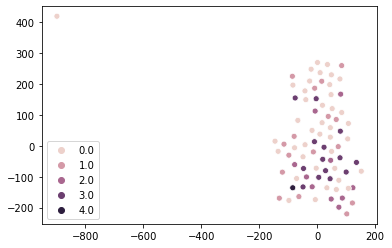

In [206]:
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend="full")

In [207]:
alt.Chart(tsne_df).mark_point().encode(
    x="TSNE_1",
    y="TSNE_2",
    color="label:N",
    tooltip=['label']
).interactive()

alt.Chart(...)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1220c9be0>,
      dtype=object)

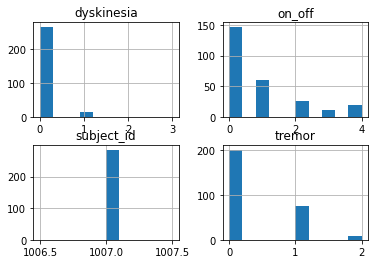

In [169]:
y_1007_df = y_df.loc[y_df["subject_id"] == 1007]
y_1007_df.hist()